In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
ground_truth = df['Depression']
print(ground_truth)
data = df.drop('Depression', axis=1)
data.head()

0         0
1         1
2         1
3         1
4         0
         ..
140695    1
140696    0
140697    0
140698    0
140699    1
Name: Depression, Length: 140700, dtype: int64


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes


Big predictors: 
Age, Being a Student, Study Satisfaction, CGPA, Academic Pressure

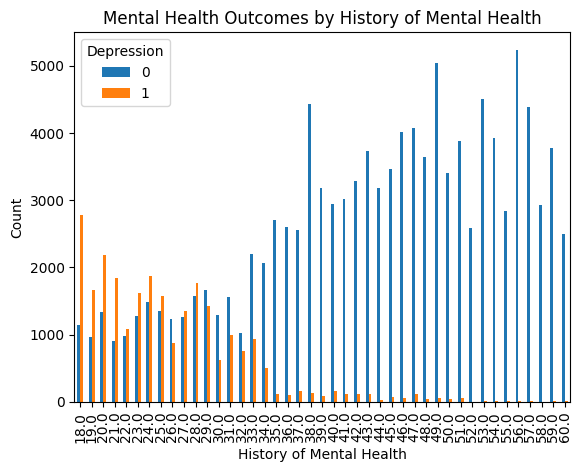

In [24]:
history = df.groupby(['Age', 'Depression']).size().unstack()

# Create the bar plot
history.plot(kind='bar', 
             )
plt.title('Mental Health Outcomes by History of Mental Health')
plt.xlabel('History of Mental Health')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

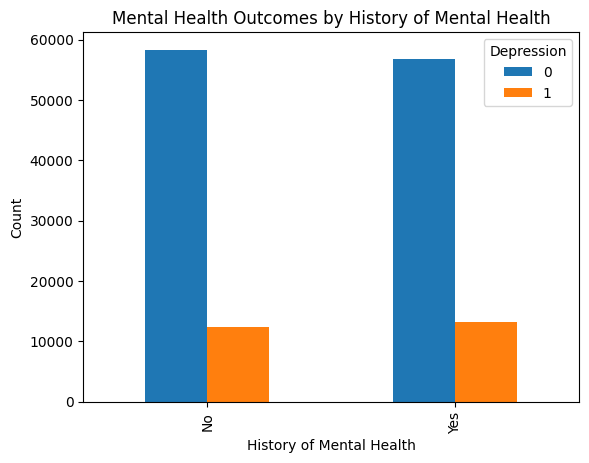

In [4]:
history = df.groupby(['Family History of Mental Illness', 'Depression']).size().unstack()

# Create the bar plot
history.plot(kind='bar')
plt.title('Mental Health Outcomes by History of Mental Health')
plt.xlabel('History of Mental Health')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

['More than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours'
 'Sleep_Duration' '1-2 hours' '6-8 hours' '4-6 hours' '6-7 hours'
 '10-11 hours' '8-9 hours' '40-45 hours' '9-11 hours' '2-3 hours'
 '3-4 hours' 'Moderate' '55-66 hours' '4-5 hours' '9-6 hours' '1-3 hours'
 'Indore' '45' '1-6 hours' '35-36 hours' '8 hours' 'No' '10-6 hours'
 'than 5 hours' '49 hours' 'Unhealthy' 'Work_Study_Hours' '3-6 hours'
 '45-48 hours' '9-5' 'Pune' '9-5 hours']
['More than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours']


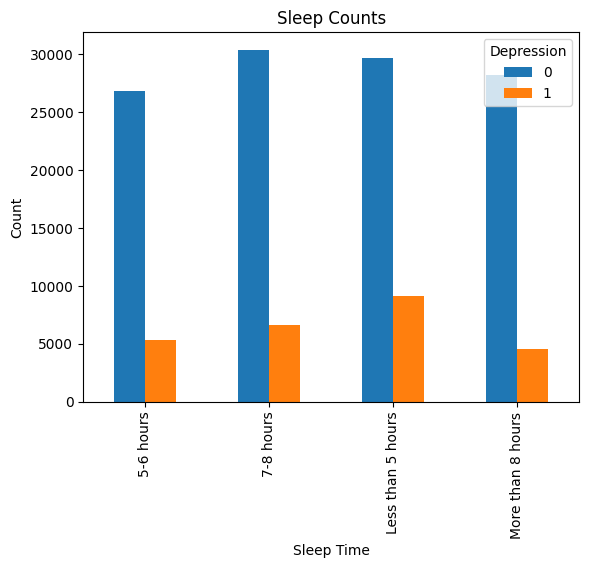

Depression
0    13819
1     2342
Name: count, dtype: int64

In [6]:
sleepUniqueVals = df['Sleep Duration'].unique()
print(sleepUniqueVals)

#tempOne = df[df['Sleep Duration'] == 'Pune']
tempTwo = df[df['Sleep Duration'] == '8 hours']

sleepFilter = ['Sleep_Duration', 'Pune', 'Indore', 'Work_Study_Hours', 'Moderate', '40-45 hours', '55-66 hours', '45', '35-36 hours', 'No', '49 hours', 'Unhealthy', '45-48 hours', 'than 5 hours', '1-2 hours', '6-8 hours', '4-6 hours', '6-7 hours', '10-11 hours', '8-9 hours', '9-11 hours', '2-3 hours', '3-4 hours', '4-5 hours', '9-6 hours', '1-3 hours', '1-6 hours', '8 hours', '10-6 hours', '3-6 hours', '9-5', '9-5 hours']
keepFilter = ['5-6 hours', '7-8 hours', 'Less than 5 hours', 'More than 8 hours']

sleepDf = df[~df['Sleep Duration'].isin(sleepFilter)]
print(sleepDf['Sleep Duration'].unique())

sleepPlot = sleepDf.groupby(['Sleep Duration', 'Depression']).size().unstack()

# Create the bar plot
sleepPlot.plot(kind='bar')
plt.title('Sleep Counts')
plt.xlabel('Sleep Time')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

sleepAndHistory = sleepDf[(sleepDf['Sleep Duration'] == 'More than 8 hours') & (sleepDf['Family History of Mental Illness'] == 'Yes')]

sleepHistoryCounts = sleepAndHistory['Depression'].value_counts()
sleepHistoryCounts

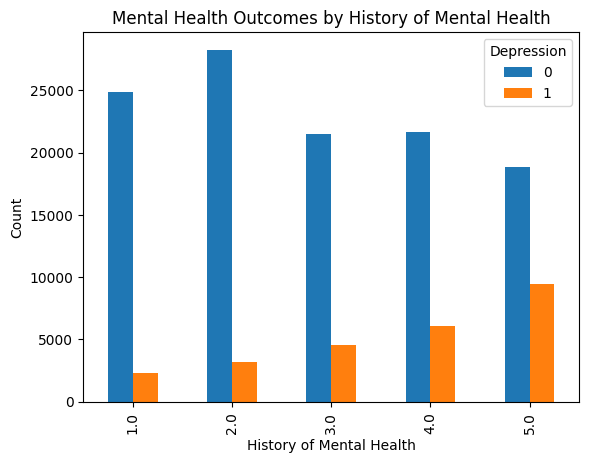

In [9]:
history = df.groupby(['Financial Stress', 'Depression']).size().unstack()

# Create the bar plot
history.plot(kind='bar')
plt.title('Mental Health Outcomes by History of Mental Health')
plt.xlabel('History of Mental Health')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()
